In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
file_path = Path("./Resources/lending_data.csv")
df_lending = pd.read_csv(file_path)

# Review the DataFrame
display(df_lending.head())
display(df_lending.tail())

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1
77535,15600.0,9.742,72300,0.585062,9,2,42300,1


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df_lending['loan_status']

# Separate the X variable, the features
X = df_lending.drop(columns=['loan_status'])

In [4]:
# Review the y variable Series
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [5]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [6]:
# Check the balance of our target values
y.value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [7]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

**Obervations:** You want the training data to come from the same distribution as the data that the inference will be performed on. Having a balanced dataset (one where the number of examples belonging to different classes does not differ too much) is desirable, although not always feasible, as is the case here.  As the results of the value_counts shows, the data is very imbalanced. Fortunately, there are algorithmic approaches that allow us to deal with an imbalanced dataset. 

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [8]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
model = LogisticRegression(solver='lbfgs', random_state=1)

# Fit the model using training data
model.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [9]:
# Make a prediction using the testing data
predictions = model.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
36831,0,0
75818,0,1
36563,0,0
13237,0,0
43292,0,0
...,...,...
38069,0,0
36892,0,0
5035,0,0
40821,0,0


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [10]:
# Print the balanced_accuracy score of the model
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(y_test, predictions)}")

Training Data Score: 0.9914878250103177
Testing Data Score: 0.9924164259182832
Balanced Accuracy Score: 0.9442676901753825


**Observations:** Balanced accuracy is a metric that one can use when evaluating how good a binary classifier is. It is especially useful when the classes are imbalanced, i.e. one of the two classes appears a lot more often than the other. This happens often in many settings such as when we are trying to detect anomalies.  It is defined as the average of recall obtained on each class.

Reviewing the score of the model and predictions seems to show a high degree of confidence in the results.

In [11]:
# Generate a confusion matrix for the model
cm = confusion_matrix(y_test, predictions)
cm

array([[18679,    80],
       [   67,   558]])

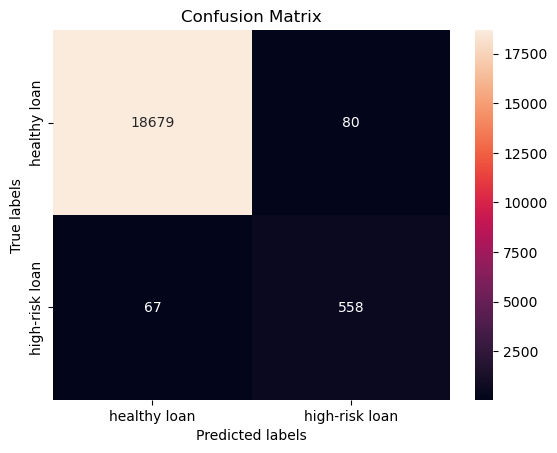

In [12]:
# Creating a visualization of the confusion matrix
# https://seaborn.pydata.org/generated/seaborn.heatmap.html 

import matplotlib.pyplot as plt
import seaborn as sn    

ax= plt.subplot()
sn.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['healthy loan', 'high-risk loan']); ax.yaxis.set_ticklabels(['healthy loan', 'high-risk loan']);

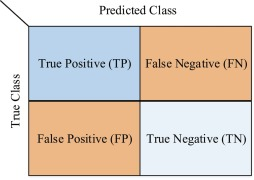

**Observations:** The confusion matrix shows that 18678 loans were correctly predicted as "healthy" and 558 loans were correctly predicted as "high-risk".  When compared to the false positive and false negative, the model shows a pretty good degree of accuracy and precision.  Still, the false positives and false negatives could be better.


In [13]:
# Print the classification report for the model
target_names = ["Class Zero", "Class One"]
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

  Class Zero       1.00      1.00      1.00     18759
   Class One       0.87      0.89      0.88       625

    accuracy                           0.99     19384
   macro avg       0.94      0.94      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** Precision and recall values would be more relevant because the cost of misclassification can be high. A high precision score is important to minimize false positives, which can lead to a loss of potential customers.

On the other hand, a high recall score is important to minimize false negatives, which can lead to significant financial losses.

This logistic regression model has high accuracy (0.99). When predicting healthy loans, RECALL shows the best overall predictive result, with both the highest true positives (helathy loans) and true negatives (high-risk loans).

However, this results is also misleading bacause our dataset is imbalanced. Sampling our data to create a more balanced dataset may result in a higher degree of precision.

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [14]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
# https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html 
# https://www.youtube.com/watch?v=P9328wVm6ao 
ros = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_resampled, y_resampled= ros.fit_resample(X_train, y_train)

In [15]:
# Count the distinct values of the resampled labels data
y_resampled.value_counts()

0    56277
1    56277
Name: loan_status, dtype: int64

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [16]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
model_ros = LogisticRegression(solver='lbfgs', random_state=1)

# Fit the model using the resampled training data
model_ros.fit(X_resampled, y_resampled)

# Make a prediction using the testing data
predictions_ros = model_ros.predict(X_test)
pd.DataFrame({"Prediction": predictions_ros, "Actual": y_test})

,Prediction,Actual
36831,0,0
75818,1,1
36563,0,0
13237,0,0
43292,0,0
...,...,...
38069,0,0
36892,0,0
5035,0,0
40821,0,0


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [17]:
# Print the balanced_accuracy score of the model 
print(f"Training Data Score: {model_ros.score(X_train, y_train)}")
print(f"Testing Data Score: {model_ros.score(X_test, y_test)}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(y_test, predictions_ros)}")

Training Data Score: 0.9941016646031091
Testing Data Score: 0.9952022286421791
Balanced Accuracy Score: 0.9959744975744975


**Observations:** Most machine learning algorithms work best when the number of samples in each class is about equal. However, if the dataset is imbalanced, the you may get high accuracy, but the results are misleading as they reflect mostly the majority class, but you fail to represent the minority class, which is most often the point of creating the model in the first place. For example, if the class distribution shows that 99% of the data has the majority class, then any basic classification model like the logistic regression will not be able to identify the minor class data points.

We can hypothesize that in our analysis, high-risk loans are a minor class.  In a dataset with highly unbalanced classes, the classifier will always “predict” the most common class and, as a result, will have a high accuracy rate.

Resampling consists of removing samples from the majority class (under-sampling) and/or adding more examples from the minority class (over-sampling).  In over-sampling, random records from the minority class are duplicated.   RandomOverSampler generates new samples by random sampling with the replacement of the currently available samples.

By resampling our data, the accuracy of our predictions approach 100%.

Source: https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/ 


In [18]:
# Generate a confusion matrix for the model
cmr = confusion_matrix(y_test, predictions_ros)
cmr

array([[18668,    91],
       [    2,   623]])

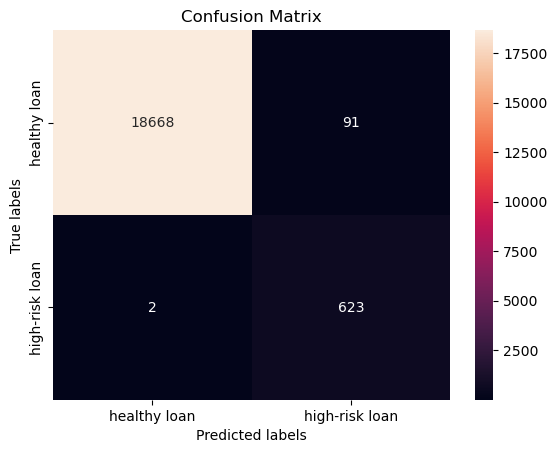

In [19]:
ax= plt.subplot()
sn.heatmap(cmr, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['healthy loan', 'high-risk loan']); ax.yaxis.set_ticklabels(['healthy loan', 'high-risk loan']);

**Observations:** The confusion matrix for our resampled dataset shows a small decrease in the predictability from our original dataset in our true positives (healthy loans = 18678) and increase in our true negatives (high-risk loans = 558).  Resampling our dataset has increased our ability to predict high risk loans, but also increases the number of healthy loans that are excluded and labeled as high-risk.  

In [20]:
# Print the classification report for the model
target_names_ros = ["Class Zero", "Class One"]
print(classification_report(y_test, predictions_ros, target_names=target_names_ros))

              precision    recall  f1-score   support

  Class Zero       1.00      1.00      1.00     18759
   Class One       0.87      1.00      0.93       625

    accuracy                           1.00     19384
   macro avg       0.94      1.00      0.96     19384
weighted avg       1.00      1.00      1.00     19384



### Step 4: Answer the following question

**Question:** How well does the logistic regression model fit with oversampled data, and predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** Looking at the two classification reports for the original dataset and resampled dataset, it looks as if model performance increased on the test data as a result of resampling the data. We get strong precision and perfect recall on the test dataset, which is a good indication about how well the model is likely to perform in real life.

The Oversampled data improves on the initial Logical Regression model. The balanced accuracy score increased from 0.942 to 0.995. It improves the predictability of true positives meaning that it is more effective at distinguishing high-risk loans with high recall accuraccy.

The oversampled model generated an accuracy score of 100% which turned out to be higher than the model fitted with imbalanced data. The oversampled model performs better because it catches mistakes such as labeling high-risk loans as healthy loans. 

A lending company might favour a model that requires a higher recall as healthy loans being identified as high-risk will turn away valuable customers and investments.  Conversely, high-risk loans identified as healthy loans might be costly for a lending companywhen the customer defaults on their loans.  Ultimately, increases our precision for high-risk loans is the favourable choice.